In [11]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from itertools import permutations
from scipy.special import binom

In [260]:
def random_partitions(n,m):
    """ this give nearly unweighted random partitions of n in to m parts
    
    nearly unweighted becouse those with symmetry are undercounted in a known way
    
    """
    base = [1 for i in range(m)]
    values = np.arange(m)
    for i in range(n-m):
        r = random.randint(0,m-1)
        # Define the values and their corresponding probabilities


        # Generate a weighted random number
        r = np.random.choice(values, p=np.array(base)/sum(base))
        base[r]+=1
    return tuple(base)



def weighted_random_partitions(n,m):
    """ this give nearly unweighted random partitions of n in to m parts
    
    nearly unweighted becouse those with symmetry are undercounted in a known way
    
    """
    base = np.array([1 for i in range(m)])
    values = np.arange(m)
    for i in range(n-m):
        r = random.randint(0,m-1)
        # Define the values and their corresponding probabilities
        weights = []
        for i in range(m):
            
            # consider forcing addition only to those values that are unique in some way. (I.E. if all the values are the same only allow addition to the first one.
            new_base = np.copy(base)
            new_base[i]+=1
            w = num_cdts(new_base)
            weights.append(w)
        
        


        # Generate a weighted random number
        r = np.random.choice(values, p=np.array(weights)*base/sum(weights*base))
        base[r]+=1
    return tuple(base)

import random

def constrained_sum_sample_pos(total,n ):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""
    
    rng = np.random.default_rng()

    dividers = sorted(rng.choice(range(1, total), n - 1, replace = False))
    return tuple([a - b for a, b in zip(dividers + [total], [0] + dividers)])






In [250]:
constrained_sum_sample_pos(8,4)

(2, 3, 1, 2)

In [122]:
def num_cdts(vp):
    total = 1
    for i,length in enumerate(vp):
        j = (i+1)%len(vp)
        total*= binom(length+vp[j],length)
    return(total)
        
        

In [261]:
num_samples = 10000
sample = [constrained_sum_sample_pos(8,4) for i in range(num_samples)]

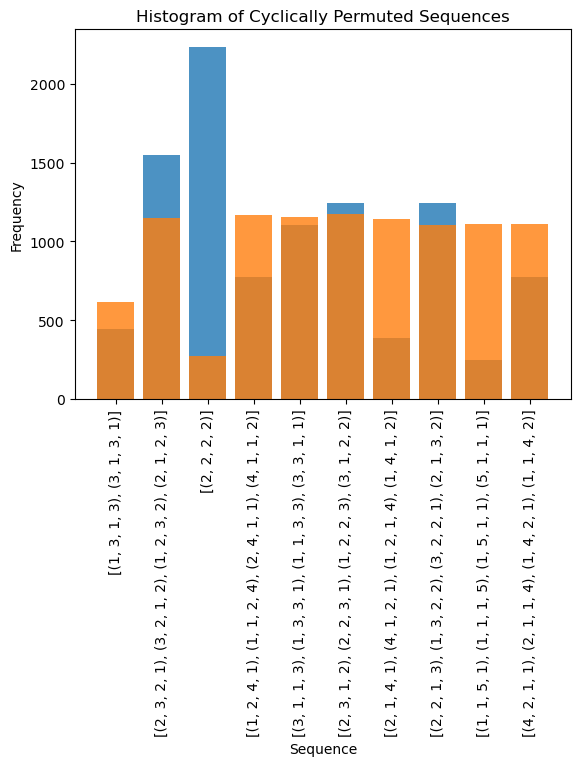

In [263]:

# Function to generate cyclic permutations of a sequence
def cyclic_permutations(seq):
    perms = set()
    n = len(seq)
    for i in range(n):
        perm = np.roll(seq,i)
        perms.add(tuple(perm))
    return frozenset(perms)

# Function to generate all permutations of a sequence
def all_permutations(seq):
    perms = frozenset(permutations(seq))
    return perms

# Count the occurrences of cyclically permutable sequences
sequence_counts = Counter()

for sequence in sample:
    perms = cyclic_permutations(sequence)
    sequence_counts[perms] += 1

# Extract sequences and their corresponding counts
sequences, counts = zip(*sequence_counts.items())

target_counts = []
for sequence in sequences:
    target_counts.append(num_cdts(list(sequence)[0]))
    
    
target_total = sum(target_counts)
for i,target_count in enumerate(target_counts):
    target_counts[i] = target_count/target_total*num_samples

# Create a bar chart to display the counts
x_values = list(range(len(sequences)))

plt.bar(x_values, target_counts,alpha = .8)
plt.bar(x_values, counts,alpha = .8)

plt.xlabel('Sequence')
plt.ylabel('Frequency')
plt.title('Histogram of Cyclically Permuted Sequences')
plt.xticks(x_values, [list(s) for s in sequences], rotation=90)
plt.show()